In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# 1) Leitura de dados experimentais (exemplo)
df = pd.read_excel("sistema1.xlsx")

df.head()

,Scan Sweep Time (Sec),Scan Number,101Time (Sec),101 (°C),102Time (Sec),102 (°C),103Time (Sec),103 (°C),104Time (Sec),104 (°C),...,113Time (Sec),113 (°C),114Time (Sec),114 (°C),115Time (Sec),115 (°C),116Time (Sec),116 (°C),117Time (Sec),117 (Vac)
0,2024-09-16 08:32:41.540,1,2024-09-16 08:32:41.540,16.674,2024-09-16 08:32:41.580,15.509,2024-09-16 08:32:41.619,15.547,2024-09-16 08:32:41.658,15.579,...,2024-09-16 08:32:42.009,15.747,2024-09-16 08:32:42.047,16.946,2024-09-16 08:32:42.086,16.908,2024-09-16 08:32:42.125,17.020,2024-09-16 08:32:43.323,0.000132
1,2024-09-16 08:32:51.525,2,2024-09-16 08:32:51.525,16.786,2024-09-16 08:32:51.564,15.502,2024-09-16 08:32:51.603,15.601,2024-09-16 08:32:51.642,15.617,...,2024-09-16 08:32:51.992,15.758,2024-09-16 08:32:52.031,16.964,2024-09-16 08:32:52.070,16.858,2024-09-16 08:32:52.109,16.987,2024-09-16 08:32:53.307,0.000131
2,2024-09-16 08:33:01.529,3,2024-09-16 08:33:01.529,16.695,2024-09-16 08:33:01.568,15.425,2024-09-16 08:33:01.607,15.558,2024-09-16 08:33:01.646,15.600,...,2024-09-16 08:33:01.996,15.799,2024-09-16 08:33:02.035,17.001,2024-09-16 08:33:02.074,16.927,2024-09-16 08:33:02.113,16.961,2024-09-16 08:33:03.311,0.000133
3,2024-09-16 08:33:11.526,4,2024-09-16 08:33:11.526,16.673,2024-09-16 08:33:11.565,15.523,2024-09-16 08:33:11.603,15.545,2024-09-16 08:33:11.642,15.597,...,2024-09-16 08:33:11.993,15.776,2024-09-16 08:33:12.032,16.991,2024-09-16 08:33:12.071,16.954,2024-09-16 08:33:12.110,16.988,2024-09-16 08:33:13.308,0.000134
4,2024-09-16 08:33:21.525,5,2024-09-16 08:33:21.525,16.766,2024-09-16 08:33:21.564,15.558,2024-09-16 08:33:21.604,15.587,2024-09-16 08:33:21.643,15.627,...,2024-09-16 08:33:21.993,15.762,2024-09-16 08:33:22.032,16.953,2024-09-16 08:33:22.071,16.946,2024-09-16 08:33:22.110,17.062,2024-09-16 08:33:23.308,0.000136


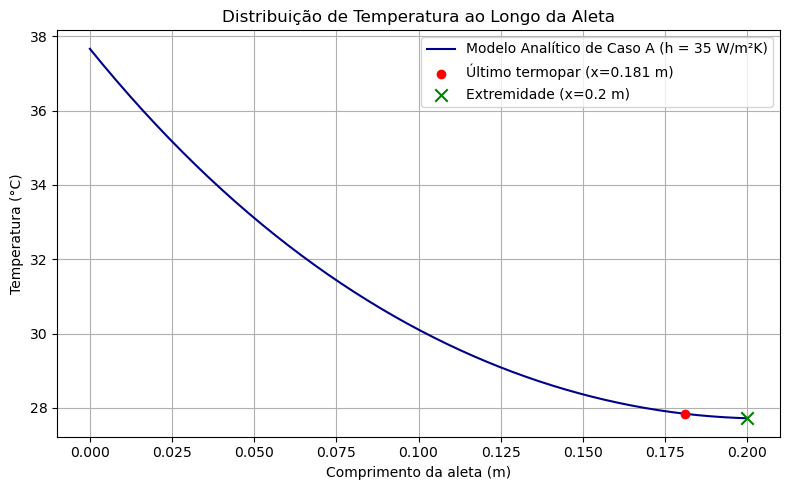

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------
# Exemplo de ajuste conforme a Figura 3 (Projeto 1)
#------------------------------------------------------------------------------
# ATENÇÃO: Ajuste as variáveis de entrada (T_base, T_amb, etc.)
# de acordo com as medições reais do seu experimento ou planilha.
#------------------------------------------------------------------------------

# 1) Leitura de dados experimentais (exemplo)
df = pd.read_excel("sistema1.xlsx")

# Temperaturas (conforme seu experimento)
T_amb  = 16.79944603        # Ajustado conforme medição real
T_base = 37.6603        # Ajuste conforme medição real

# 2) Propriedades do material
k = 154.87675  # [W/m.K] (Alumínio 2014 aproximado)
h = 35   # [W/m².K] estimativa de convecção forçada

# 3) Dimensões da aleta conforme desenho:
#    - Comprimento total ~ 200 mm
#    - Diâmetro nominal ~ 24 mm
L = 0.20      # metros (200 mm)
D = 0.024     # metros (24 mm)
Ac = np.pi*(D/2)**2  # área de seção transversal [m²]
P  = np.pi*D         # perímetro lateral [m]

# 4) Posição do último termopar
#    Conforme o desenho, o último furo está a 181 mm da base esquerda
x_ultimo_termopar = 0.181  # em metros

# 5) Cálculo do parâmetro m
m = np.sqrt( (h * P) / (k * Ac) )

# 6) Solução analítica da distribuição de temperatura
#    (regime estacionário, com T(0)=T_base e convecção na ponta x=L)
x = np.linspace(0, L, 200)

# Excesso de temperatura (theta) = (T - T_amb)
numerador   = np.cosh(m*(L - x)) + (h/(m*k))*np.sinh(m*(L - x))
denominador = np.cosh(m*L)       + (h/(m*k))*np.sinh(m*L)
theta       = numerador / denominador

# Temperatura absoluta
T_analitico = T_amb + (T_base - T_amb)*theta

# 7) Temperatura no último termopar e na extremidade (ponta) da aleta
T_no_ultimo_termopar  = np.interp(x_ultimo_termopar, x, T_analitico)
T_extremidade         = T_analitico[-1]  # valor em x=L

# 8) Gráfico
plt.figure(figsize=(8, 5))
plt.plot(x, T_analitico, label=f"Modelo Analítico de Caso A (h = {h} W/m²K)", color="darkblue")

# Marcar posição do último termopar
plt.scatter(x_ultimo_termopar, T_no_ultimo_termopar,
            color='red', zorder=5,
            label=f"Último termopar (x={x_ultimo_termopar:.3f} m)")

# Marcar extremidade
plt.scatter(L, T_extremidade,
            color='green', marker='x', s=80, zorder=5,
            label=f"Extremidade (x={L} m)")

plt.xlabel("Comprimento da aleta (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Distribuição de Temperatura ao Longo da Aleta")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#------------------------------------------------------------------------------
# Observações:
# - O valor de L=0.20 m reflete a dimensão de 200 mm total no desenho.
# - O diâmetro D=0.024 m (24 mm) foi estimado pelo projeto (Figura 3).
# - A posição do último termopar (x=0.181 m) corresponde aos 181 mm indicados.
# - Ajuste T_base, T_amb, h etc. conforme o seu experimento real.
#------------------------------------------------------------------------------


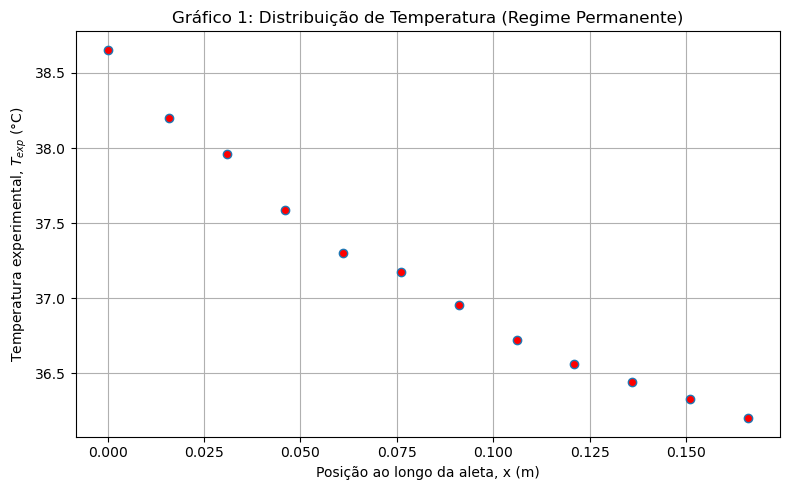

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Definir posições em metros (conforme seu projeto)
posicoes = [
    0.000,  # 102
    0.016,  # 103
    0.031,  # 104
    0.046,  # 105
    0.061,  # 106
    0.076,  # 107
    0.091,  # 108
    0.106,  # 109
    0.121,  # 110
    0.136,  # 111
    0.151,  # 112
    0.166,  # 113
]

# 2) Definir as temperaturas de regime permanente para cada posição
temperaturas_regime = [
    38.6539659,
    38.19681406,
    37.9613098,
    37.58870612,
    37.29912524,
    37.17184537,
    36.95232024,
    36.72467427,
    36.56374458,
    36.44537572,
    36.32803351,
    36.20083494,
]

# 3) Plot
plt.figure(figsize=(8,5))
plt.plot(posicoes, temperaturas_regime, 'o', markerfacecolor='red')
plt.xlabel("Posição ao longo da aleta, x (m)")
plt.ylabel("Temperatura experimental, $T_{exp}$ (°C)")
plt.title("Gráfico 1: Distribuição de Temperatura (Regime Permanente)")
plt.grid(True)
plt.tight_layout()
plt.show()


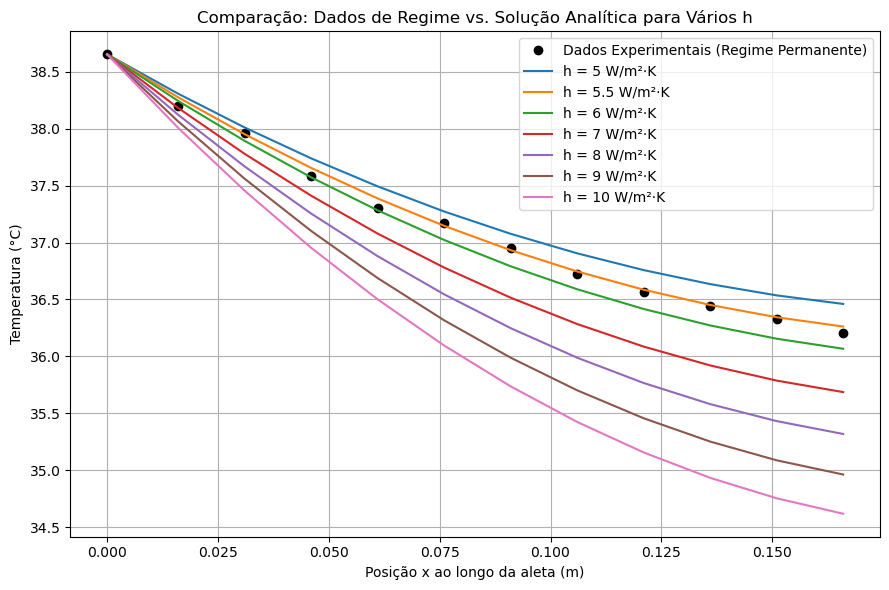

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 1) CARREGAR O ARQUIVO (SE PRECISAR DE OUTROS DADOS, MAS NÃO USAREMOS AQUI PARA A MÉDIA)
# ------------------------------------------------------------------------------
# df = pd.read_excel("sistema1.xlsx")
# (Podemos ler se quisermos examinar outras colunas, mas já temos as médias de regime.)

# ------------------------------------------------------------------------------
# 2) DEFINIR POSIÇÕES E TEMPERATURAS EXPERIMENTAIS (REGIME PERMANENTE)
# ------------------------------------------------------------------------------
#   - Posições:  canal 102 em x=0, canal 103 em x=0.016, etc.
#   - Temperaturas: as médias de regime fornecidas (na mesma ordem).
posicoes_exp = [
    0.000,  # 102
    0.016,  # 103
    0.031,  # 104
    0.046,  # 105
    0.061,  # 106
    0.076,  # 107
    0.091,  # 108
    0.106,  # 109
    0.121,  # 110
    0.136,  # 111
    0.151,  # 112
    0.166,  # 113
    # Se existir canal 114, acrescente aqui, ex. 0.181
]

temperaturas_exp = [
    38.6539659,  # 102 (°C)
    38.19681406, # 103
    37.9613098,  
    37.58870612, 
    37.29912524, 
    37.17184537, 
    36.95232024, 
    36.72467427, 
    36.56374458, 
    36.44537572, 
    36.32803351, 
    36.20083494,
    # Se existir canal 114, acrescente aqui
]

# ------------------------------------------------------------------------------
# 3) DEFINIR PARÂMETROS DO PROBLEMA
# ------------------------------------------------------------------------------
T_amb  = 16.79944603      # Temperatura ambiente (°C)
T_base = 38.6539659          # Temperatura na base da aleta (°C)
k = 154.87675             # [W/m·K] - condutividade do alumínio 2014 (aprox.)

# Dimensões da aleta
L = 0.20   # Comprimento total = 0,20 m
D = 0.024  # Diâmetro = 24 mm
Ac = np.pi*(D/2)**2  # Área da seção transversal
P  = np.pi*D         # Perímetro lateral

# Lista de valores de h (W/m²·K) para testar
h_values = [5, 5.5, 6, 7, 8, 9, 10]

# ------------------------------------------------------------------------------
# 4) FUNÇÃO PARA CALCULAR T_ANALÍTICO EM QUALQUER PONTO x, DADO h
# ------------------------------------------------------------------------------
def T_aleta(x, h):
    """
    Retorna a temperatura analítica na posição x (m),
    dada T_base, T_amb, condutividade k, etc.
    Condição de ponta convectiva (x=L).
    """
    # Cálculo de m
    m_val = np.sqrt((h * P) / (k * Ac))
    
    # F1 e F2 (fatores para solução analítica)
    F1 = np.cosh(m_val*(L - x)) + (h/(m_val*k))*np.sinh(m_val*(L - x))
    F2 = np.cosh(m_val*L)       + (h/(m_val*k))*np.sinh(m_val*L)
    
    # T(x)
    return T_amb + (T_base - T_amb)*(F1 / F2)

# ------------------------------------------------------------------------------
# 5) PLOTAR OS DADOS EXPERIMENTAIS + CURVAS ANALÍTICAS PARA VÁRIOS h
# ------------------------------------------------------------------------------
plt.figure(figsize=(9, 6))

# (5a) Plot dos pontos experimentais de regime permanente
plt.plot(posicoes_exp, temperaturas_exp, 'o',
         color='black', label='Dados Experimentais (Regime Permanente)')

# (5b) Para cada valor de h, calcular T_analitico e plotar
for h in h_values:
    # Se quiser uma curva suave, poderíamos usar uma malha fina em x:
    # x_fino = np.linspace(0, L, 100)
    # T_modelo = [T_aleta(xx, h) for xx in x_fino]
    # plt.plot(x_fino, T_modelo, '-', label=f"h={h}")

    # Mas, para comparar ponto a ponto com os mesmos x dos termopares:
    T_modelo_nos = [T_aleta(xp, h) for xp in posicoes_exp]
    plt.plot(posicoes_exp, T_modelo_nos, '-',
             label=f"h = {h} W/m²·K")

plt.xlabel("Posição x ao longo da aleta (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Comparação: Dados de Regime vs. Solução Analítica para Vários h")
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


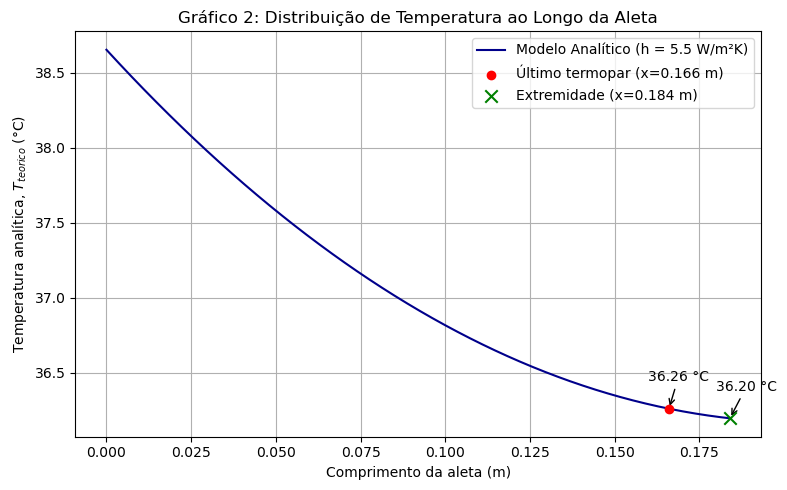

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------
# 1) Leitura de dados experimentais (ajustar conforme necessário)
df = pd.read_excel("sistema1.xlsx")

# 2) Parâmetros de entrada
T_base = 38.6539659       # °C
T_amb  = 16.79944603      # °C
k = 154.87675             # W/m.K
h = 5.5                   # W/m².K (estimativa para convecção)
L = 0.20                  # m (200 mm)
D = 0.024                 # m (24 mm)
Ac = np.pi*(D/2)**2
P  = np.pi*D

# Posição do último termopar
x_ultimo_termopar = 0.166  # m

#------------------------------------------------------------------------------
# 3) Cálculo do modelo analítico
#------------------------------------------------------------------------------
m = np.sqrt((h * P) / (k * Ac))

# Vamos gerar x de 0 a L (ou, se quiser, 0 a 0.184, mas aqui usaremos 0 a L)
x = np.linspace(0, 0.184, 200)

F1 = np.cosh(m*(L - x)) + (h/(m*k))*np.sinh(m*(L - x))
F2 = np.cosh(m*L)       + (h/(m*k))*np.sinh(m*L)
theta = F1 / F2  # fração do deltaT (T_base - T_amb)

T_analitico = T_amb + (T_base - T_amb)*theta

# Temperatura no último termopar e na extremidade
T_no_ultimo_termopar = np.interp(x_ultimo_termopar, x, T_analitico)
T_extremidade        = T_analitico[-1]  # valor em x=L

#------------------------------------------------------------------------------
# 4) Gráfico
#------------------------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(x, T_analitico, label=f"Modelo Analítico (h = {h} W/m²K)", color="darkblue")

# Posição do último termopar (vermelho)
plt.scatter(x_ultimo_termopar, T_no_ultimo_termopar,
            color='red', zorder=5,
            label=f"Último termopar (x={x_ultimo_termopar:.3f} m)")

# Adiciona anotação (temperatura) ao lado do último termopar
plt.annotate(f"{T_no_ultimo_termopar:.2f} °C",
             (x_ultimo_termopar, T_no_ultimo_termopar),
             xytext=(-15, 20), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

# Posição da extremidade (verde)
plt.scatter(0.184, T_extremidade,
            color='green', marker='x', s=80, zorder=5,
            label=f"Extremidade (x={0.184:.3f} m)")

# Anotar a temperatura na extremidade
plt.annotate(f"{T_extremidade:.2f} °C",
             (0.184, T_extremidade),
             xytext=(-10, 20), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.xlabel("Comprimento da aleta (m)")
plt.ylabel("Temperatura analítica, $T_{teorico}$ (°C)")
plt.title("Gráfico 2: Distribuição de Temperatura ao Longo da Aleta")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Concluído em 1500 iterações.
Erro máximo na última iteração: 9.93e-07
Δx = 0.0182 m,  Δt = 2.0992e+00 s


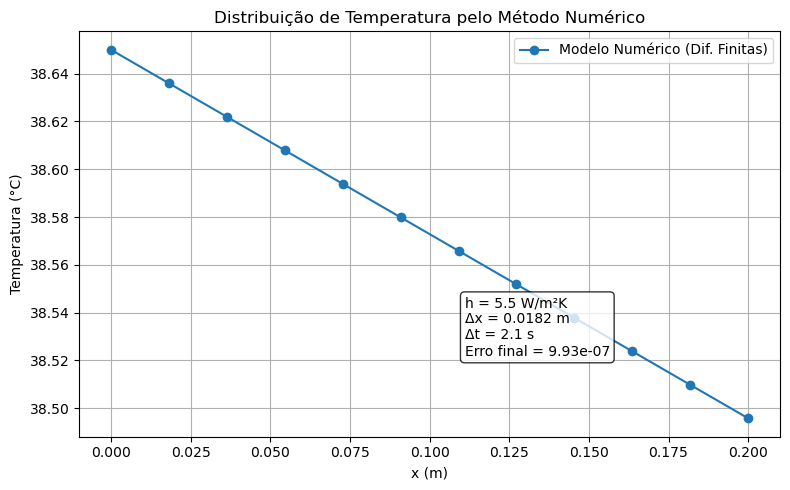

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# PARÂMETROS FÍSICOS E GEOMÉTRICOS
# ---------------------------------------------------------------------------
L   = 0.200         # Comprimento da aleta (m)
D   = 0.024         # Diâmetro da aleta (m)
k   = 154.87675     # Condutividade térmica (W/m·K)
h   = 5.5           # Coeficiente de convecção (W/m²·K)
rho = 2794          # Densidade (kg/m³)
cp  = 880           # Calor específico (J/kg·K)

T_amb   = 16.8      # Temperatura ambiente (°C)
T_base  = 38.65     # Temperatura da base da aleta (°C)

# ---------------------------------------------------------------------------
# MALHA DE DIFERENÇAS FINITAS
# ---------------------------------------------------------------------------
Nx = 12                     # Número total de nós = 12
dx = L / (Nx - 1)           # Espaçamento
A  = np.pi * (D/2)**2       # Área de seção transversal
P  = np.pi * D              # Perímetro

alpha = k / (rho * cp)      # Difusividade térmica (m²/s)

# Passo de tempo (exemplo; ajuste conforme estabilidade/desejo)
dt = 0.8 * (dx**2) / (2*alpha)

# ---------------------------------------------------------------------------
# VETORES DE TEMPERATURA: cada nó i (0 <= i < Nx)
# ---------------------------------------------------------------------------
# Inicializando TODO o domínio em 17 °C
T_old = np.full(Nx, 17.0)
# Base (nó 0) fixo em T_base
T_old[0] = T_base

T_new = T_old.copy()

# ---------------------------------------------------------------------------
# CRITÉRIOS DE PARADA
# ---------------------------------------------------------------------------
max_iter = 10000   # número máximo de iterações
tol      = 1.0e-6  # tolerância para o erro
erro_max = 1.0
n_iter   = 0

# ---------------------------------------------------------------------------
# LOOP NO TEMPO (ITERANDO ATÉ CONVERGÊNCIA)
# ---------------------------------------------------------------------------
while n_iter < max_iter and erro_max > tol:
    for i in range(1, Nx-1):
        T_new[i] = (T_old[i] 
                    + alpha * dt / dx**2 * (T_old[i+1] - 2*T_old[i] + T_old[i-1]))

    # BC 1: nó da base (x=0) - temperatura fixa
    T_new[0] = T_base
    
    # BC 2: nó da extremidade (x=L) - convecção
    i = Nx-1
    a = alpha * dt / dx**2
    T_new[i] = ( T_old[i]
                 + a*(2*T_old[i-1] - 2*T_old[i])
                 + 2*alpha*(dt/dx)*(h/k)*(T_amb - T_old[i]) )

    # Cálculo do erro e preparação para a próxima iteração
    erro_max = np.max(np.abs(T_new - T_old))
    T_old[:] = T_new[:]
    n_iter  += 1

# ---------------------------------------------------------------------------
# RESULTADO
# ---------------------------------------------------------------------------
print(f"Concluído em {n_iter} iterações.")
print(f"Erro máximo na última iteração: {erro_max:.2e}")
print(f"Δx = {dx:.4f} m,  Δt = {dt:.4e} s")

# ---------------------------------------------------------------------------
# GRÁFICO DA SOLUÇÃO NUMÉRICA
# ---------------------------------------------------------------------------
x_coords = np.linspace(0, L, Nx)
plt.figure(figsize=(8,5))
plt.plot(x_coords, T_new, '-o', label="Modelo Numérico (Dif. Finitas)")

plt.title("Distribuição de Temperatura pelo Método Numérico")
plt.xlabel("x (m)")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.legend()

# Box com dados do problema
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
msg = (f"h = {h} W/m²K\n"
       f"Δx = {dx:.4f} m\n"
       f"Δt = {dt:.2} s\n"
       f"Erro final = {erro_max:.2e}")
plt.text(0.55, 0.2, msg, transform=plt.gca().transAxes, bbox=props)

plt.tight_layout()
plt.show()
